## **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## **DATA LOAD**

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


## **DATA PREPROCESSING**

In [ ]:
print(tf.shape(training_images))
training_images=training_images/255
test_images=test_images/255
training_images=tf.reshape(training_images,(60000,28,28,1))

tf.Tensor([60000    28    28     1], shape=(4,), dtype=int32)


## **DATA VISUALIZATION**

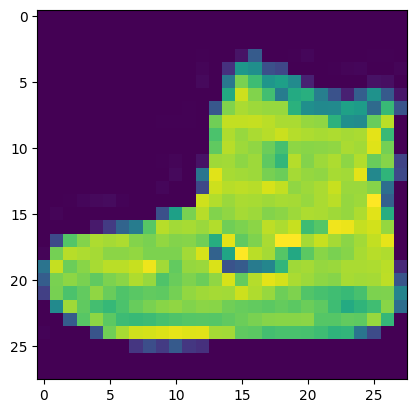

In [ ]:
plt.imshow(training_images[0])


## **MACHINE LEARNING ALGORITHM**

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
ml_algo=tf.keras.models.Sequential([

      tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='valid'),
      tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='valid'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=128,activation='relu'),
      tf.keras.layers.Dense(units=512,activation='relu'),
      tf.keras.layers.Dense(units=1024,activation='relu'),
      tf.keras.layers.Dense(units=2048,activation='relu'),
      tf.keras.layers.Dense(units=10,activation='softmax'),
])

ml_algo.summary()
ml_algo.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=ml_algo.fit(training_images,training_labels,epochs=1)
losses=ml_algo.evaluate(test_images,test_labels)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

## **Model Evaluation and Testing**

In [15]:
tf.shape(test_images)
test_images=tf.reshape(test_images,(10000,28,28,1))
print(tf.shape(test_images))

predictions=ml_algo.predict(test_images)


tf.Tensor([10000    28    28     1], shape=(4,), dtype=int32)
313/313 [==============================] - 24s 76ms/step


In [19]:
l=np.argmax(predictions[0])
fashion = ['T-shirt/top',' Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(l)
print(test_labels)


9
[9 2 1 ... 8 1 5]


Text(0.5, 1.0, 'Ankle Boot')

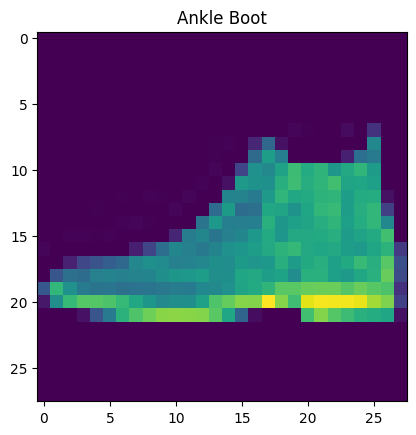

In [23]:
plt.imshow(test_images[0])
plt.title(str(fashion[l]))
